### Predicting Bitcoin value using Linear Regression

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
data = pd.read_csv('bitcoin.csv')
data

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
1,2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2,2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
3,2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
4,2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17
...,...,...,...,...,...,...,...,...
1642,2015-10-12,BTCUSD,249.50,249.50,247.60,247.60,38.28,9493.89
1643,2015-10-11,BTCUSD,246.30,249.50,246.30,249.50,12.22,3021.12
1644,2015-10-10,BTCUSD,245.39,246.30,244.60,246.30,12.17,2984.44
1645,2015-10-09,BTCUSD,243.95,249.97,243.60,245.39,30.99,7651.63


In [3]:
data = data.iloc[::-1,:]
data = data.reset_index()
data = data.drop('index',axis=1)
data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2015-10-08,BTCUSD,242.50,245.00,242.5,243.95,18.80,4595.84
1,2015-10-09,BTCUSD,243.95,249.97,243.6,245.39,30.99,7651.63
2,2015-10-10,BTCUSD,245.39,246.30,244.6,246.30,12.17,2984.44
3,2015-10-11,BTCUSD,246.30,249.50,246.3,249.50,12.22,3021.12
4,2015-10-12,BTCUSD,249.50,249.50,247.6,247.60,38.28,9493.89


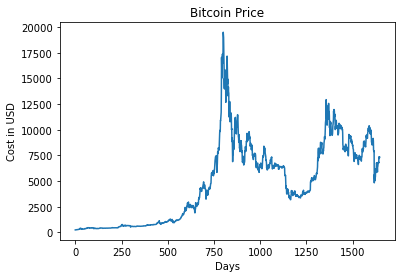

<Figure size 720x576 with 0 Axes>

In [4]:
# Plotting the target feature
plt.plot(data['Close'])
plt.xlabel('Days')
plt.ylabel('Cost in USD')
plt.title('Bitcoin Price')
plt.figure(figsize=(10,8))
plt.show()

In [5]:
price = data[['Close']]
print(price)

        Close
0      243.95
1      245.39
2      246.30
3      249.50
4      247.60
...       ...
1642  7336.96
1643  7201.81
1644  7369.60
1645  7315.25
1646  7315.25

[1647 rows x 1 columns]


In [6]:
#Assigning the number of days to predict in future 
futuredays = 100

In [7]:
#Creating a dataframe coloumn with shifted values to predict the future values
price['Predictions'] = data['Close'].copy().shift(-futuredays)

<ipython-input-7-1a1c4de17ce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Predictions'] = data['Close'].copy().shift(-futuredays)


In [8]:
price

,Close,Predictions
0,243.95,384.25
1,245.39,383.90
2,246.30,385.03
3,249.50,380.58
4,247.60,417.51
...,...,...
1642,7336.96,NaN
1643,7201.81,NaN
1644,7369.60,NaN
1645,7315.25,NaN


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = price['Close'][:-futuredays] #Do not include the future days

In [11]:
X = np.array(X)

In [12]:
X = X.reshape(-1,1) #It should be a 2D array

In [13]:
X

array([[ 243.95],
       [ 245.39],
       [ 246.3 ],
       ...,
       [7216.27],
       [7165.9 ],
       [7175.2 ]])

In [14]:
y = price['Predictions'][:-futuredays] #The number of days should match with X

In [15]:
y = np.array(y)

In [16]:
y.reshape(-1,1)

array([[ 384.25],
       [ 383.9 ],
       [ 385.03],
       ...,
       [7369.6 ],
       [7315.25],
       [7315.25]])

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [18]:
xtrain

array([[ 6710.26],
       [ 7072.7 ],
       [15041.  ],
       ...,
       [  451.99],
       [ 3532.25],
       [15148.92]])

In [19]:
xtest

array([[ 6931.59],
       [ 6688.01],
       [ 1015.18],
       [ 4098.03],
       [ 9599.07],
       [ 8209.88],
       [ 9084.31],
       [ 9171.01],
       [  315.  ],
       [ 4155.55],
       [ 7192.73],
       [ 6250.02],
       [ 6465.97],
       [16250.  ],
       [ 6508.36],
       [  622.17],
       [ 5503.64],
       [10753.17],
       [ 1895.55],
       [ 9308.45],
       [ 6313.83],
       [ 2844.99],
       [ 9282.65],
       [ 8466.31],
       [  393.08],
       [ 2026.  ],
       [  431.47],
       [ 6297.7 ],
       [ 6759.51],
       [  322.75],
       [  907.19],
       [  702.  ],
       [ 3799.99],
       [ 6401.09],
       [ 4751.08],
       [  782.47],
       [  899.53],
       [  398.27],
       [ 3533.49],
       [ 8769.2 ],
       [ 6412.64],
       [10562.46],
       [ 6243.21],
       [13725.53],
       [ 7520.11],
       [ 8023.14],
       [  379.39],
       [19260.5 ],
       [ 8004.36],
       [ 2689.58],
       [  272.49],
       [ 6717.88],
       [ 818

In [20]:
ytrain

array([3692.35, 6500.  , 8599.01, ...,  587.57, 5329.97, 7875.94])

In [21]:
ytest

array([ 5606.38,  3195.43,  2101.33, 15418.95,  9202.17, 11467.19,
        8065.1 ,  9816.97,   371.47, 15797.49,  5653.03,  6407.43,
        3637.28,  8197.29,  6153.83,   713.6 ,  3820.26,  9219.51,
        4371.25,  6580.76,  3789.99,  5849.37,  8197.  ,  6258.36,
         448.  ,  4589.99,   584.44,  6759.51,  3826.96,   423.97,
        1346.04,  1133.68,  7801.  ,  3415.99, 11240.19,   967.14,
        1362.63,   449.9 ,  5266.34,  6711.16,  3395.49,  7691.26,
        3667.82,  8265.81,  9158.02,  9497.68,   458.  ,  7794.46,
        9773.12,  4327.63,   395.54,  6580.22,  8715.01,  7352.82,
         380.07,  3917.49,   697.7 ,  9084.31,  2304.36,   789.39,
       10183.63,  3845.73,  3588.67,   578.77,  7262.52,  9599.88,
        2638.24,   923.87, 10132.44,  7329.11,  6380.  ,  7998.07,
        6550.  ,  7286.93,  3421.45,  9017.58,   413.16, 10528.81,
         753.99,  9649.99, 11166.92,   387.21,  8110.99,  3624.11,
        6437.66,   672.74,  1054.72,  8553.5 ,  8073.9 ,   443

In [22]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
# Training the model
model.fit(xtrain,ytrain)

LinearRegression()

In [25]:
#To predict The fututre values based on the last 100 days of the existing values
# xfuture is actually existing values
xfuture = price['Close'].tail(100)

In [26]:
xfuture = xfuture.to_frame()

In [27]:
xfuture

,Close
1547,6944.90
1548,7333.00
1549,7352.82
1550,7351.77
1551,7762.72
...,...
1642,7336.96
1643,7201.81
1644,7369.60
1645,7315.25


In [28]:
xfuture = np.array(xfuture)
print(xfuture)

[[ 6944.9 ]
 [ 7333.  ]
 [ 7352.82]
 [ 7351.77]
 [ 7762.72]
 [ 8158.5 ]
 [ 8042.02]
 [ 7820.01]
 [ 8190.89]
 [ 8023.48]
 [ 8173.14]
 [ 8110.  ]
 [ 8827.01]
 [ 8813.5 ]
 [ 8715.01]
 [ 8900.45]
 [ 8907.78]
 [ 8700.66]
 [ 8627.64]
 [ 8716.76]
 [ 8664.08]
 [ 8391.37]
 [ 8425.18]
 [ 8330.01]
 [ 8583.74]
 [ 8901.8 ]
 [ 9399.  ]
 [ 9280.04]
 [ 9497.68]
 [ 9330.55]
 [ 9380.6 ]
 [ 9321.  ]
 [ 9278.51]
 [ 9167.01]
 [ 9615.04]
 [ 9761.36]
 [ 9816.97]
 [ 9912.53]
 [10168.41]
 [ 9860.08]
 [10269.46]
 [10352.74]
 [10245.39]
 [10372.74]
 [ 9903.34]
 [ 9933.8 ]
 [ 9705.1 ]
 [10187.97]
 [ 9597.25]
 [ 9610.11]
 [ 9703.44]
 [ 9675.67]
 [ 9977.24]
 [ 9665.85]
 [ 9311.4 ]
 [ 8780.08]
 [ 8809.86]
 [ 8704.88]
 [ 8525.13]
 [ 8528.4 ]
 [ 8912.92]
 [ 8751.88]
 [ 8757.05]
 [ 9067.35]
 [ 9158.02]
 [ 8902.65]
 [ 8038.84]
 [ 7932.95]
 [ 7881.02]
 [ 7935.49]
 [ 4830.45]
 [ 5653.03]
 [ 5169.05]
 [ 5343.45]
 [ 5035.56]
 [ 5343.07]
 [ 5420.45]
 [ 6191.02]
 [ 6205.18]
 [ 6208.45]
 [ 5839.44]
 [ 6500.  ]
 [ 6775.57]
 [ 6

In [29]:
model.predict(xfuture)

array([6641.50791001, 6897.08155196, 6910.13352203, 6909.44207054,
       7180.063014  , 7440.69412973, 7363.98911088, 7217.78992446,
       7462.02376194, 7351.78005311, 7450.3349391 , 7408.75565605,
       7880.92483156, 7872.02815569, 7807.17000574, 7929.28692448,
       7934.11391442, 7797.72016869, 7749.63465636, 7808.3224249 ,
       7773.63131575, 7594.04490015, 7616.30963819, 7553.63779201,
       7720.72539874, 7930.17593354, 8257.59467814, 8179.25651672,
       8322.57794789, 8212.51862612, 8245.4778139 , 8206.22971016,
       8178.24897312, 8104.82340992, 8399.86246894, 8496.21788066,
       8532.83846873, 8595.76713975, 8764.27057573, 8561.22749141,
       8830.81455027, 8885.65653146, 8814.96384797, 8898.82703607,
       8589.71529288, 8609.7739714 , 8459.16925119, 8777.15132924,
       8388.14730509, 8396.61593955, 8458.07609931, 8439.78885366,
       8638.38030742, 8433.3221359 , 8199.90786795, 7850.02024249,
       7869.63112385, 7800.49914516, 7682.12923498, 7684.28261

In [30]:
price['Predictions'].tail(100)

1547   NaN
1548   NaN
1549   NaN
1550   NaN
1551   NaN
        ..
1642   NaN
1643   NaN
1644   NaN
1645   NaN
1646   NaN
Name: Predictions, Length: 100, dtype: float64

In [31]:
#visualizing the data

In [32]:
predicted_value = model.predict(xfuture)
predicted_value

array([6641.50791001, 6897.08155196, 6910.13352203, 6909.44207054,
       7180.063014  , 7440.69412973, 7363.98911088, 7217.78992446,
       7462.02376194, 7351.78005311, 7450.3349391 , 7408.75565605,
       7880.92483156, 7872.02815569, 7807.17000574, 7929.28692448,
       7934.11391442, 7797.72016869, 7749.63465636, 7808.3224249 ,
       7773.63131575, 7594.04490015, 7616.30963819, 7553.63779201,
       7720.72539874, 7930.17593354, 8257.59467814, 8179.25651672,
       8322.57794789, 8212.51862612, 8245.4778139 , 8206.22971016,
       8178.24897312, 8104.82340992, 8399.86246894, 8496.21788066,
       8532.83846873, 8595.76713975, 8764.27057573, 8561.22749141,
       8830.81455027, 8885.65653146, 8814.96384797, 8898.82703607,
       8589.71529288, 8609.7739714 , 8459.16925119, 8777.15132924,
       8388.14730509, 8396.61593955, 8458.07609931, 8439.78885366,
       8638.38030742, 8433.3221359 , 8199.90786795, 7850.02024249,
       7869.63112385, 7800.49914516, 7682.12923498, 7684.28261

In [33]:
close = np.array(data['Close'])

In [34]:
predicted = np.append(close,predicted_value)

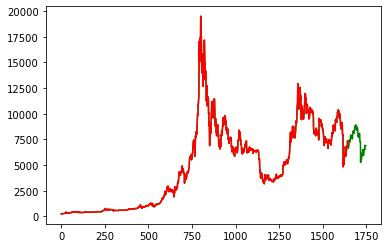

In [35]:
plt.plot(predicted ,color = 'green')
plt.plot(close , color = 'red')

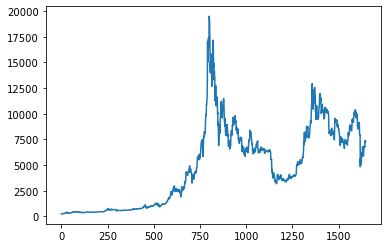

In [36]:
plt.plot(data['Close'])